## Contents
* [1. EDA for Weather Data](#1.EDA-for-Weather-Data)
* [2. Read & Clean Data](#2.-Read-&-Clean-Data)
* [3. EDA - Trends over Time](#3.-EDA---Trends-over-Time)
* [4. EDA - Deep Dive into Weekly Dengue Data](#4.-EDA---Deep-Dive-into-Weekly-Dengue-Data)

---
## 1. EDA for Dengue Data
---
- This notebook will explore and analyse (if any) the characteristics of and trends within the Singapore dengue data.
- Data is extracted from [MOH Infectious Diseases Bulletin 1](https://www.moh.gov.sg/resources-statistics/infectious-disease-statistics/2020/weekly-infectious-diseases-bulletin), [2](https://www.moh.gov.sg/resources-statistics/infectious-disease-statistics/2022/weekly-infectious-diseases-bulletin), [3](https://www.moh.gov.sg/resources-statistics/infectious-disease-statistics/2021/weekly-infectious-diseases-bulletin).

---
## 2. Read & Clean Data
---

### Imports & Function

In [1]:
import numpy as np 
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#Visualisation:
import seaborn               as sns
import matplotlib.pyplot     as plt
sns.set_theme(style="whitegrid")

from tqdm import tqdm
tqdm.pandas()

#Showing missing, duplicates, shape, dtypes
def df_summary(df):
    print(f"Shape(col,rows): {df.shape}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print('---'*20)
    print(f'Number of each unqiue datatypes:\n{df.dtypes.value_counts()}')
    print('---'*20)
    print("Columns with missing values:")
    isnull_df = pd.DataFrame(df.isnull().sum()).reset_index()
    isnull_df.columns = ['col','num_nulls']
    isnull_df['perc_null'] = ((isnull_df['num_nulls'])/(len(df))).round(2)
    print(isnull_df[isnull_df['num_nulls']>0])

In [2]:
weekly_df = pd.read_csv('data/input/Dengue_weekly.csv')

In [3]:
monthly_df = pd.read_csv('data/input/Dengue_monthly.csv')

### Weekly Data Check

In [4]:
weekly_df.head()

,Epidemiology Wk,Start,End,Dengue,DHF,month_year
0,1.0,2012-01-01,2012-01-07,74,0,2012-01-01
1,2.0,2012-01-08,2012-01-14,64,2,2012-01-01
2,3.0,2012-01-15,2012-01-21,60,1,2012-01-01
3,4.0,2012-01-22,2012-01-28,50,2,2012-01-01
4,5.0,2012-01-29,2012-02-04,84,1,2012-01-01


In [5]:
weekly_df.describe()

,Epidemiology Wk,Dengue,DHF
count,574.000000,574.000000,574.000000
mean,26.592334,285.677700,0.738676
std,15.076455,295.525991,1.078750
min,1.000000,24.000000,0.000000
25%,14.000000,81.000000,0.000000
50%,27.000000,208.000000,0.000000
75%,40.000000,372.000000,1.000000
max,53.000000,1791.000000,8.000000


In [6]:
df_summary(weekly_df)

Shape(col,rows): (574, 6)
Number of duplicates: 0
------------------------------------------------------------
Number of each unqiue datatypes:
object     3
int64      2
float64    1
dtype: int64
------------------------------------------------------------
Columns with missing values:
Empty DataFrame
Columns: [col, num_nulls, perc_null]
Index: []


In [7]:
weekly_df.loc[weekly_df['Epidemiology Wk']==53,:]

,Epidemiology Wk,Start,End,Dengue,DHF,month_year
156,53.0,2014-12-28,2015-01-03,158,0,2014-12-01
469,53.0,2020-12-27,2021-01-02,193,1,2020-12-01


### Monthly Data Check

In [8]:
df_summary(monthly_df)
monthly_df.head()
monthly_df.describe()

Shape(col,rows): (132, 3)
Number of duplicates: 0
------------------------------------------------------------
Number of each unqiue datatypes:
int64     2
object    1
dtype: int64
------------------------------------------------------------
Columns with missing values:
Empty DataFrame
Columns: [col, num_nulls, perc_null]
Index: []


,Year_Month,Dengue,DHF
0,2012-01-01,332,6
1,2012-02-01,257,1
2,2012-03-01,229,2
3,2012-04-01,360,3
4,2012-05-01,337,1


,Dengue,DHF
count,132.000000,132.000000
mean,1242.265152,3.212121
std,1284.670201,3.464168
min,134.000000,0.000000
25%,357.250000,1.000000
50%,866.500000,2.000000
75%,1523.250000,4.000000
max,6557.000000,17.000000


---
## 3. EDA - Trends over Time
---

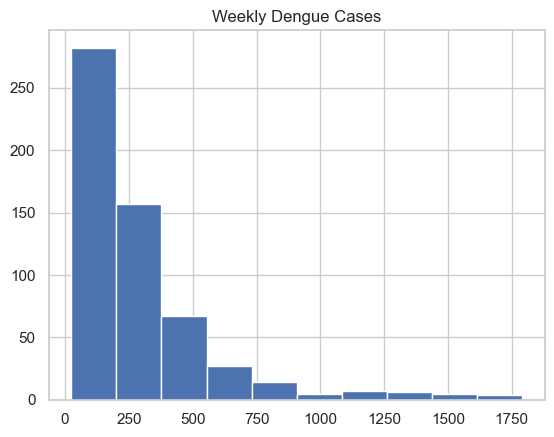

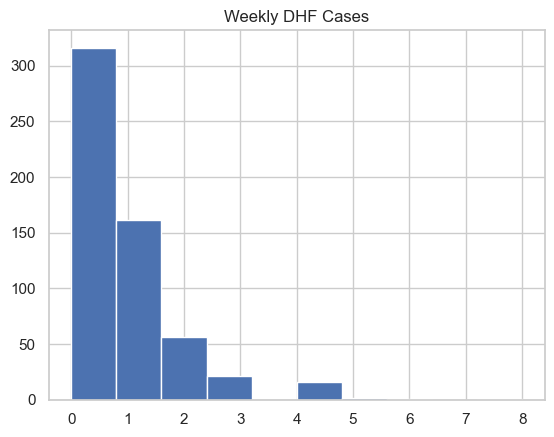

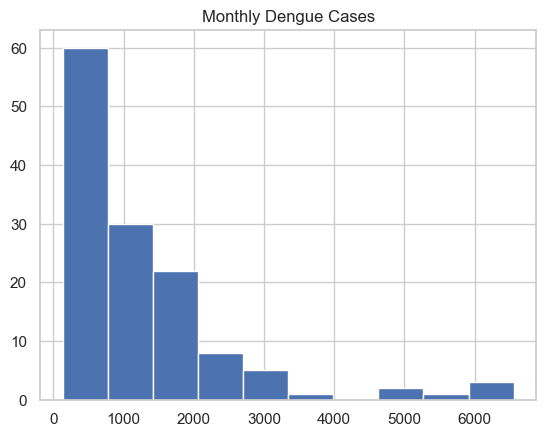

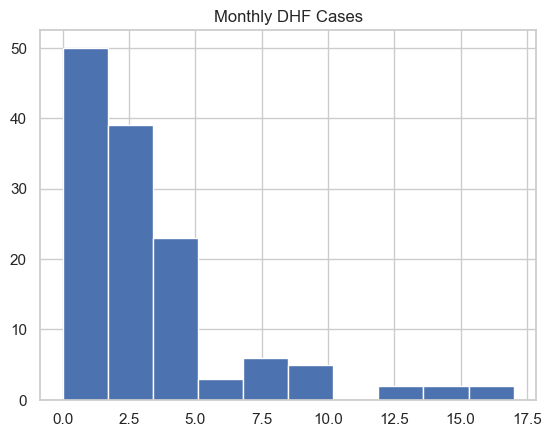

In [9]:
plt.hist(weekly_df['Dengue'])
plt.title('Weekly Dengue Cases')
plt.show();

plt.hist(weekly_df['DHF'])
plt.title('Weekly DHF Cases')
plt.show();

plt.hist(monthly_df['Dengue'])
plt.title('Monthly Dengue Cases')
plt.show();

plt.hist(monthly_df['DHF'])
plt.title('Monthly DHF Cases')
plt.show();

### Weekly across year (wk1 - 53)

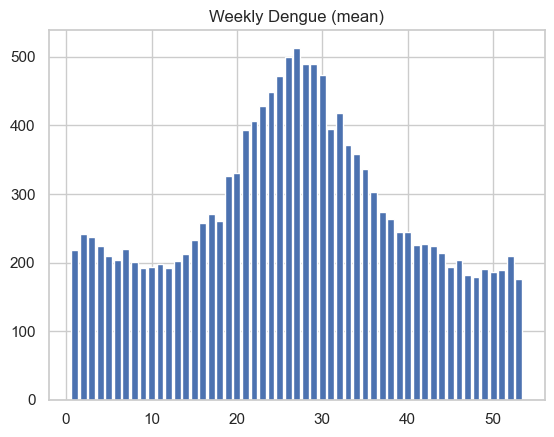

In [10]:
_s = weekly_df.groupby('Epidemiology Wk')['Dengue'].mean()
plt.bar(_s.index, _s.values)
plt.title("Weekly Dengue (mean)");

### Month across year (Jan-Dec)

In [11]:
monthly_df['Year_Month'] = pd.to_datetime(monthly_df['Year_Month'], yearfirst=True)

In [12]:
monthly_df['Month'] = monthly_df['Year_Month'].dt.month
monthly_df['Year'] = monthly_df['Year_Month'].dt.year


In [13]:
monthly_df.head()

,Year_Month,Dengue,DHF,Month,Year
0,2012-01-01,332,6,1,2012
1,2012-02-01,257,1,2,2012
2,2012-03-01,229,2,3,2012
3,2012-04-01,360,3,4,2012
4,2012-05-01,337,1,5,2012


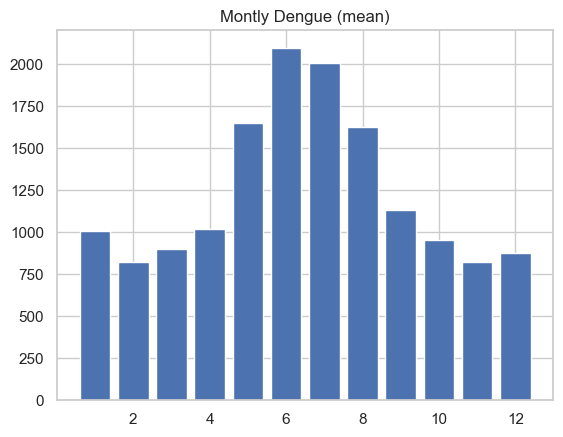

In [14]:
_s = monthly_df.groupby('Month')['Dengue'].mean()
plt.bar(_s.index, _s.values);
plt.title("Montly Dengue (mean)");

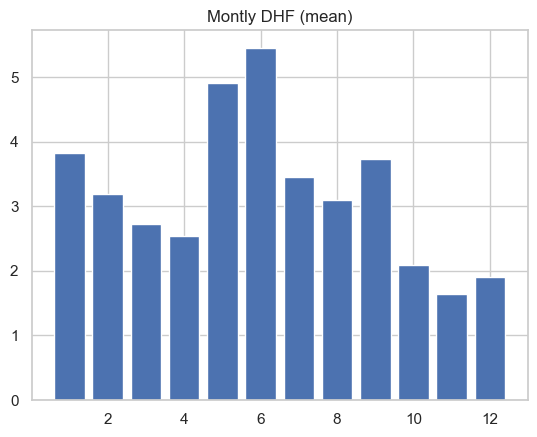

In [15]:
_s = monthly_df.groupby('Month')['DHF'].mean()
plt.bar(_s.index, _s.values);
plt.title("Montly DHF (mean)");

### Annual Total

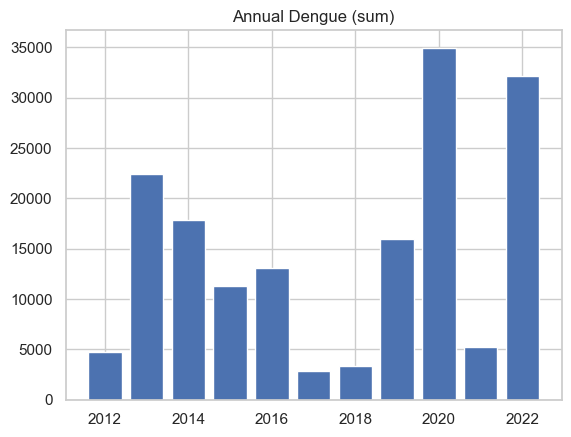

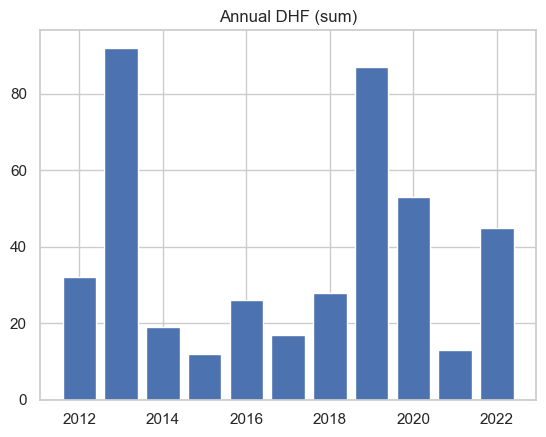

In [16]:
_s = monthly_df.groupby('Year')['Dengue'].sum()
plt.bar(_s.index, _s.values);
plt.title("Annual Dengue (sum)");
plt.show();
_s = monthly_df.groupby('Year')['DHF'].sum()
plt.bar(_s.index, _s.values);
plt.title("Annual DHF (sum)");
plt.show();


### Across the 574 weeks

In [17]:
weekly_df.loc[:,['Epidemiology Wk','Start','Dengue','DHF']]

,Epidemiology Wk,Start,Dengue,DHF
0,1.0,2012-01-01,74,0
1,2.0,2012-01-08,64,2
2,3.0,2012-01-15,60,1
3,4.0,2012-01-22,50,2
4,5.0,2012-01-29,84,1
...,...,...,...,...
569,48.0,2022-11-27,242,0
570,49.0,2022-12-04,326,1
571,50.0,2022-12-11,289,1
572,51.0,2022-12-18,272,0


In [18]:
weekly_df.dtypes

Epidemiology Wk    float64
Start               object
End                 object
Dengue               int64
DHF                  int64
month_year          object
dtype: object

In [19]:
weekly_df['Start'] = pd.to_datetime(weekly_df['Start'], yearfirst=True)

In [20]:
_df = weekly_df.loc[:,['Epidemiology Wk','Start','Dengue','DHF']]
_df.rename(columns = {'Start':"Week"}, inplace=True)

In [21]:
_df.set_index('Week',inplace=True)
_df = _df.sort_index()

In [22]:
_df.head()
_df.dtypes

,Epidemiology Wk,Dengue,DHF
Week,,,
2012-01-01,1.0,74,0
2012-01-08,2.0,64,2
2012-01-15,3.0,60,1
2012-01-22,4.0,50,2
2012-01-29,5.0,84,1


Epidemiology Wk    float64
Dengue               int64
DHF                  int64
dtype: object

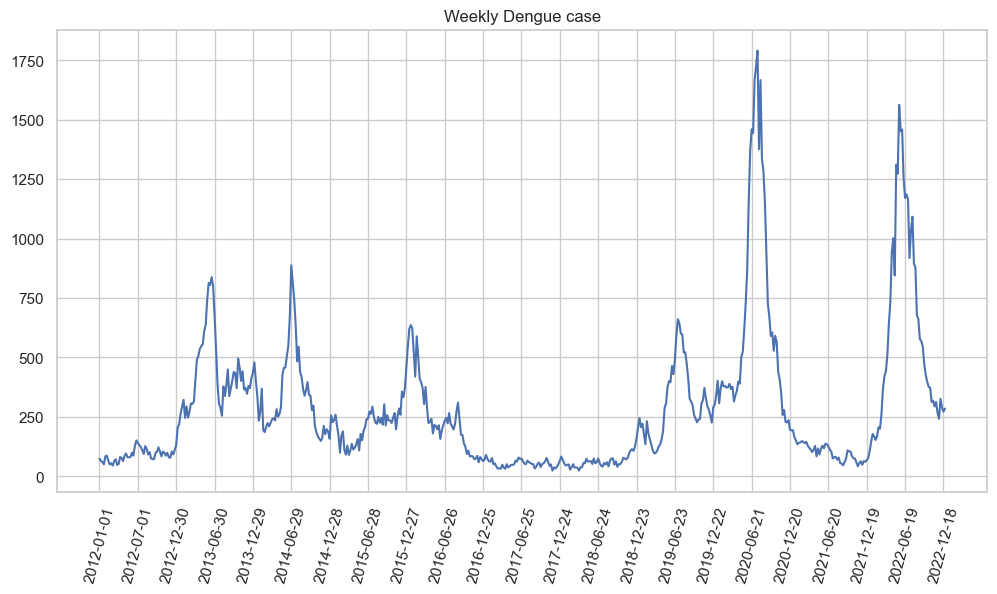

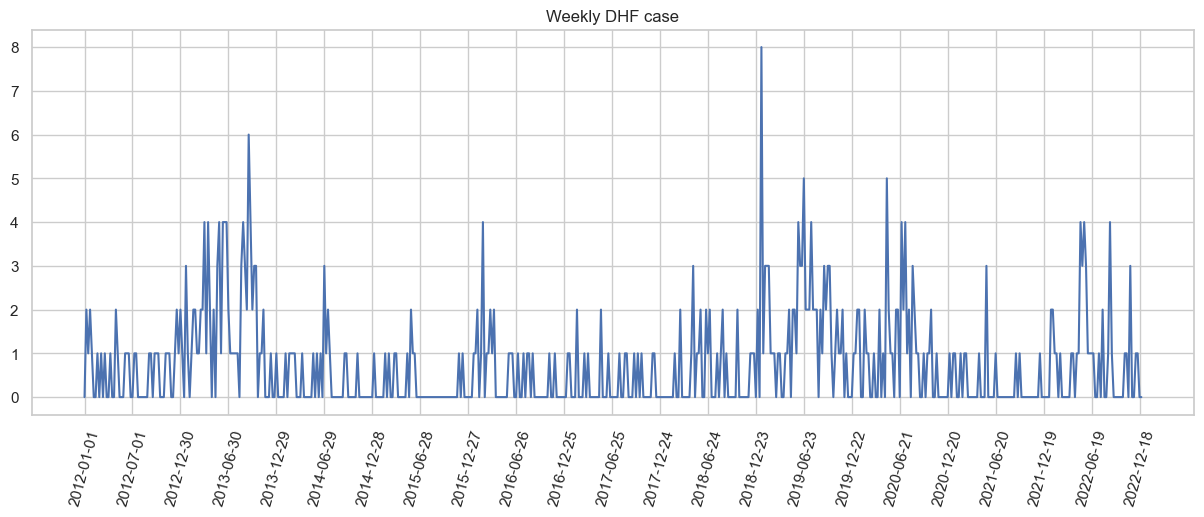

In [23]:
fig = plt.figure(figsize=(12,6))
plt.plot(_df['Dengue'])
plt.xticks(_df.index[0::26],rotation=75)
plt.title('Weekly Dengue case')
plt.show();

fig = plt.figure(figsize=(15,5))
plt.plot(_df['DHF'])
plt.xticks(_df.index[0::26],rotation=75)
plt.title('Weekly DHF case')
plt.show();

---
## 4. EDA - Deep Dive into Weekly Dengue Data
---

In [24]:
_df_dengue = _df['Dengue']
_df_dengue = pd.DataFrame(_df_dengue)
_df_dengue

,Dengue
Week,
2012-01-01,74
2012-01-08,64
2012-01-15,60
2012-01-22,50
2012-01-29,84
...,...
2022-11-27,242
2022-12-04,326
2022-12-11,289


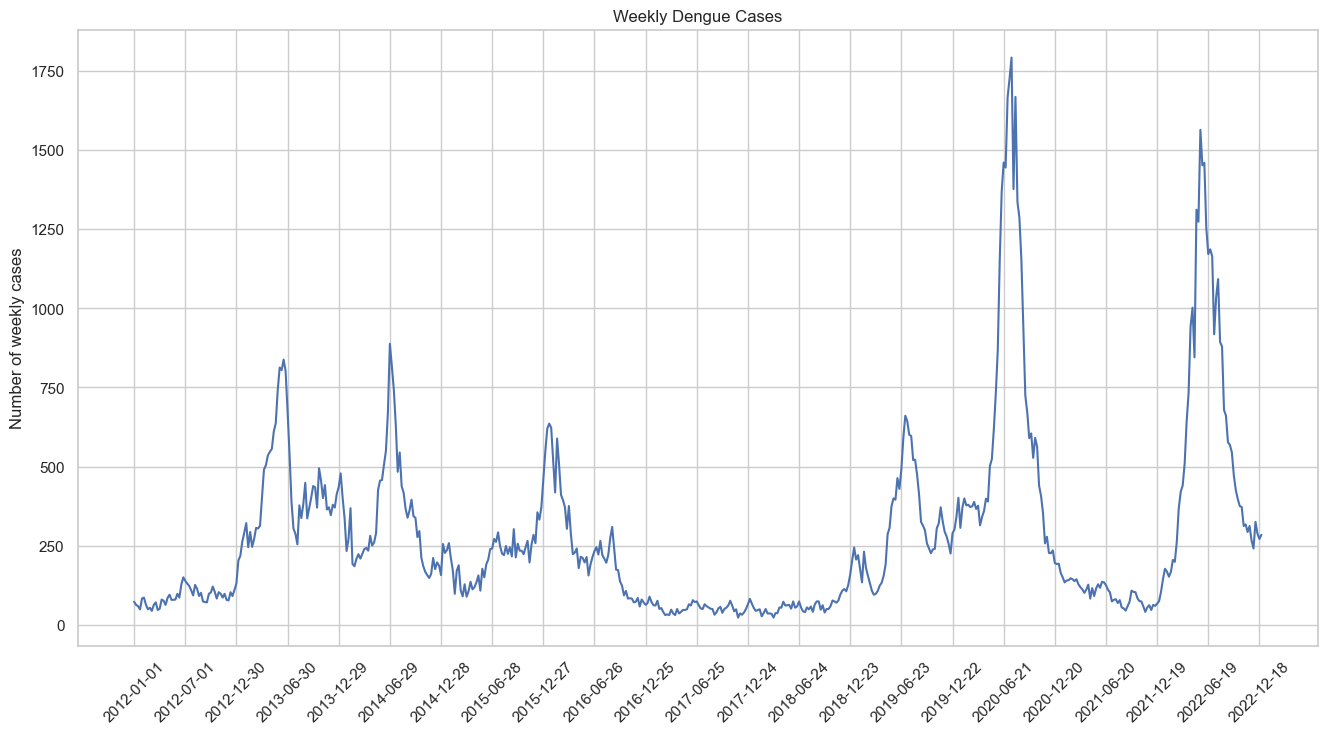

In [25]:
plt.figure(figsize=(16,8))

plt.plot(_df_dengue);
plt.xticks(_df_dengue.index[0::26], rotation=45);
plt.ylabel('Number of weekly cases')
plt.title('Weekly Dengue Cases');
plt.show();

### seasonal_decompose

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

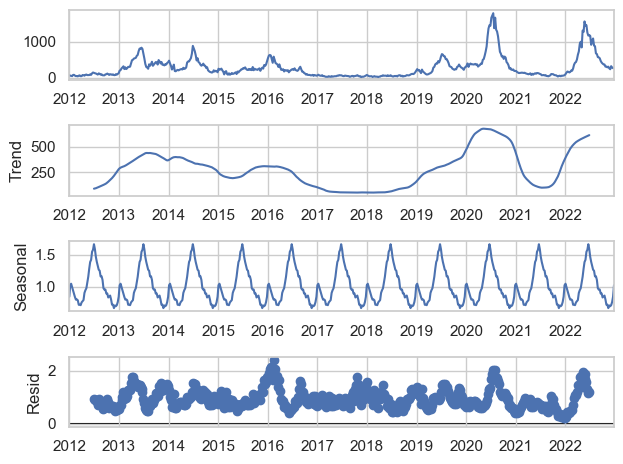

In [27]:
decompose_result_mult = seasonal_decompose(_df_dengue, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

### Rolling Means

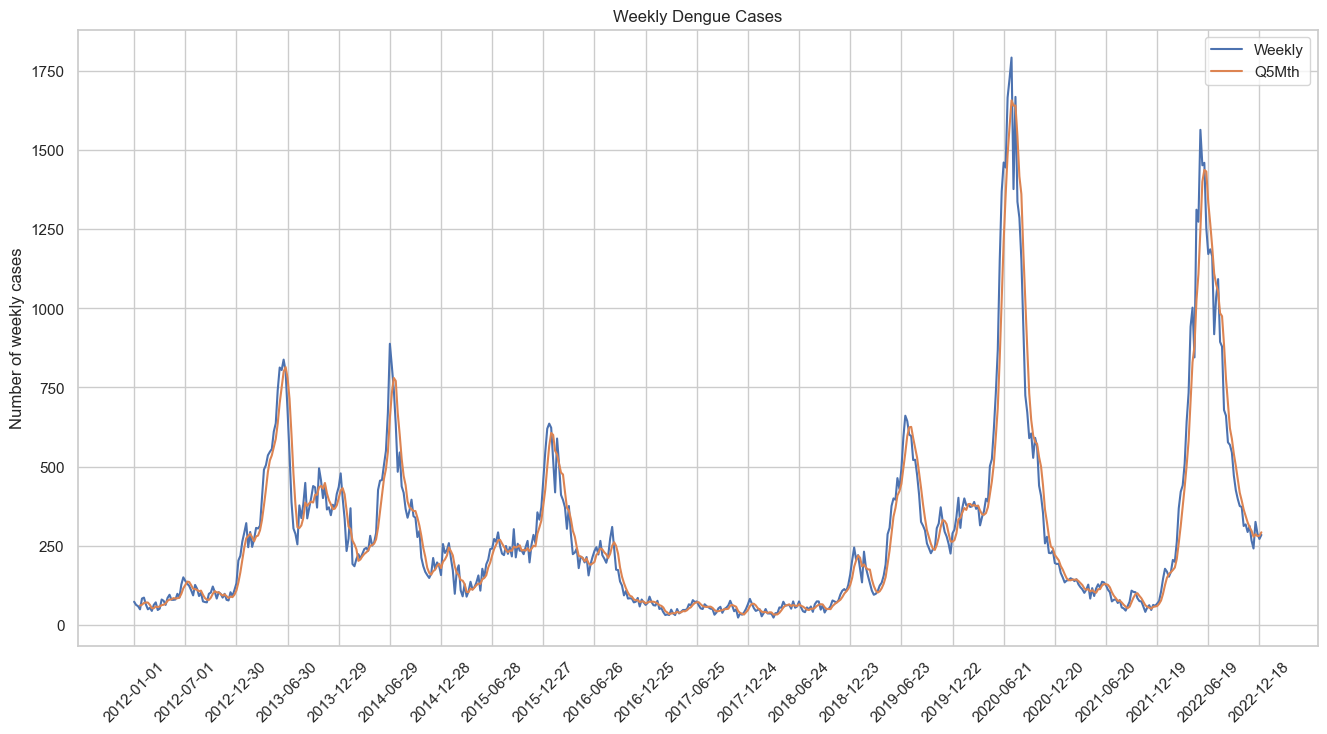

In [28]:
plt.figure(figsize=(16,8))

plt.plot(_df_dengue, label='Weekly')
plt.plot(_df_dengue.rolling(4).mean(), label='Q5Mth')

plt.xticks(_df_dengue.index[0::26], rotation=45);
plt.ylabel('Number of weekly cases')
plt.title('Weekly Dengue Cases');

plt.legend();
plt.show();

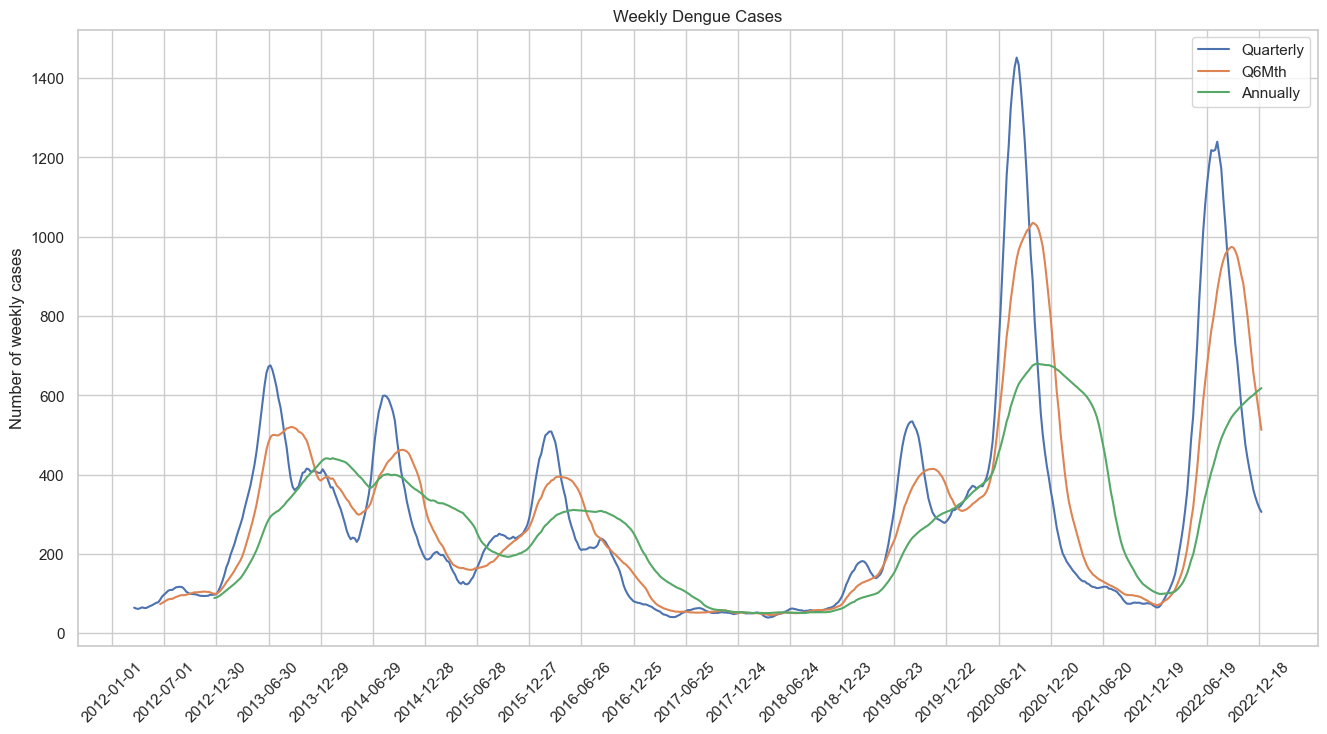

In [29]:
plt.figure(figsize=(16,8))

plt.plot(_df_dengue.rolling(12).mean(), label='Quarterly')
plt.plot(_df_dengue.rolling(25).mean(), label='Q6Mth')
plt.plot(_df_dengue.rolling(52).mean(), label='Annually')

plt.xticks(_df_dengue.index[0::26], rotation=45);
plt.ylabel('Number of weekly cases')
plt.title('Weekly Dengue Cases');

plt.legend();
plt.show();

### ACF and PACF

In [30]:
_df_dengue['diff_1'] = _df_dengue['Dengue'].diff()
_df_dengue['diff_2'] =_df_dengue['Dengue'].diff(2)
_df_dengue.head()

,Dengue,diff_1,diff_2
Week,,,
2012-01-01,74,NaN,NaN
2012-01-08,64,-10.0,NaN
2012-01-15,60,-4.0,-14.0
2012-01-22,50,-10.0,-14.0
2012-01-29,84,34.0,24.0


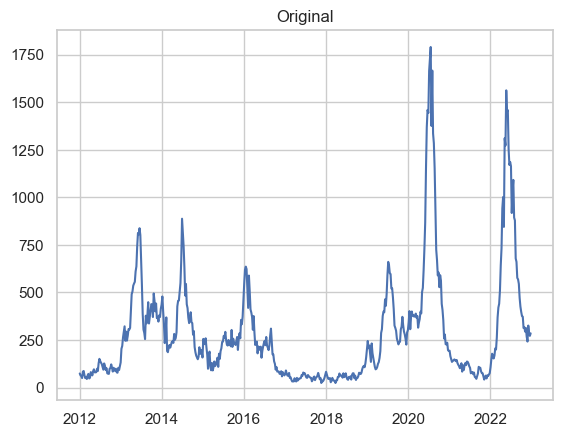

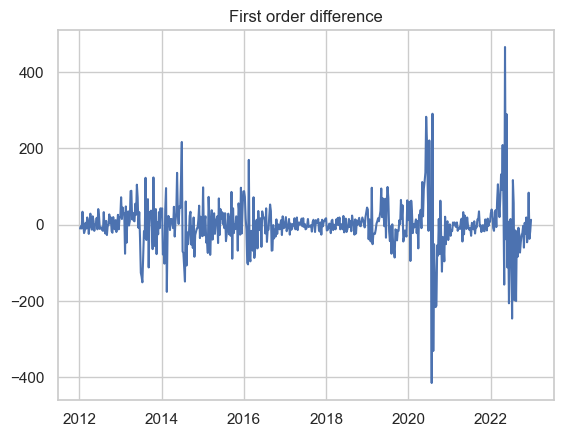

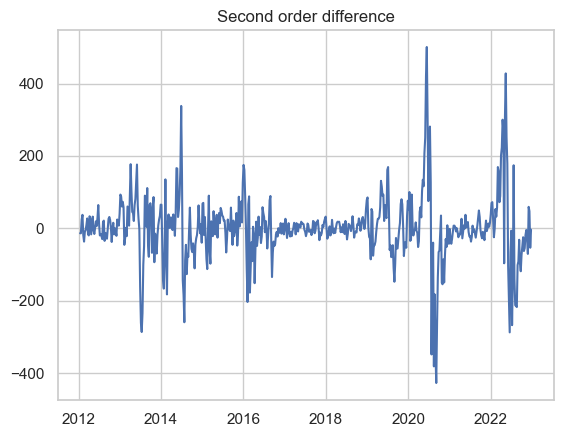

In [31]:
plt.plot(_df_dengue['Dengue'])
plt.title('Original')
plt.show();
plt.plot(_df_dengue['diff_1'])
plt.title('First order difference')
plt.show();
plt.plot(_df_dengue['diff_2'] )
plt.title('Second order difference')
plt.show();

In [32]:
from pmdarima.arima import ADFTest
#Stationary test
adf_test = ADFTest(alpha = 0.05) 
adf_test.should_diff(_df_dengue['Dengue'])
adf_test.should_diff(_df_dengue['diff_1'].dropna())
adf_test.should_diff(_df_dengue['diff_2'].dropna())

(0.01, False)

(0.01, False)

(0.01, False)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
sns.set_theme(style="whitegrid")

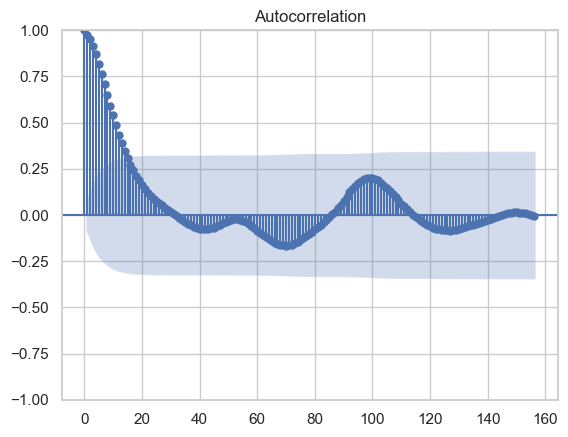

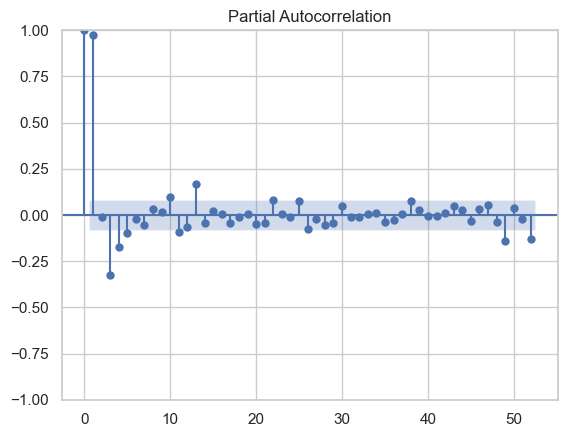

In [34]:
_s = _df_dengue['Dengue']

plot_acf(_s, lags=52*3);
plt.show();
plot_pacf(_s,
          lags=52,
         method = "ols");
plt.show();